## Mapping the Data
In `02_st-cleaing-5yr.ipynb` we found that there are some hotspots for street cleaning violations. Here let's map them out.  
Alternatively, I also marked hotposts on [Google MyMap](https://www.google.com/maps/d/edit?mid=1hqpDiDN_2dWwhyBaKwjsPb2qxoinSww&usp=sharing) for better view with analysis neighborhood.

### Import Data

In [2]:
import pandas as pd
import requests

In [3]:
# Geocoding addresses from Pandas
# Import citation_st_cleaning_5yr.csv
st_cleaning_map = pd.read_csv('cleaned_st_cleaning_18_22.csv',
                              dtype={'Citation Number': object} ,
                              parse_dates=['Citation Issued DateTime'])

In [4]:
st_cleaning_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399109 entries, 0 to 2399108
Data columns (total 15 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Citation Number               object        
 1   Citation Issued DateTime      datetime64[ns]
 2   Violation                     object        
 3   Violation Description         object        
 4   Citation Location             object        
 5   Vehicle Plate State           object        
 6   Vehicle Plate                 object        
 7   Fine Amount                   float64       
 8   Date Added                    object        
 9   geom                          object        
 10  Neighborhoods                 float64       
 11  SF Find Neighborhoods         float64       
 12  Current Police Districts      float64       
 13  Current Supervisor Districts  float64       
 14  Analysis Neighborhoods        float64       
dtypes: datetime64[ns](1), float64(6)

In [5]:
# Add new column with complete address for 'Citation Location' for geocoding
st_cleaning_map['Location_new'] = st_cleaning_map['Citation Location'].astype(str) + ', SAN FRANCISCO, USA'

In [6]:
st_cleaning_map.head(10)

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Location_new
0,894375451,2018-02-20 10:15:00,TRC7.2.22,STR CLEAN,3898 WASHINGTON ST,CA,ELBA227,73.0,08/10/2021 12:00:00 AM,POINT (-122.45708101499997 37.788961003000054),10.0,10.0,8.0,6.0,31.0,"3898 WASHINGTON ST, SAN FRANCISCO, USA"
1,895929086,2018-03-29 09:35:00,TRC7.2.22,STR CLEAN,812 SILLIMAN ST,CA,7TGY978,73.0,08/10/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"812 SILLIMAN ST, SAN FRANCISCO, USA"
2,938910103,2021-05-03 12:13:00,TRC7.2.22,STR CLEAN,1820 25TH ST,CA,6HKN775,83.0,08/08/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"1820 25TH ST, SAN FRANCISCO, USA"
3,900852466,2018-08-13 08:24:00,TRC7.2.22,STR CLEAN,173 ARKANSAS ST,CA,56907K2,76.0,02/13/2022 12:00:00 AM,POINT (-122.39854476899995 37.76402533000004),54.0,54.0,1.0,9.0,26.0,"173 ARKANSAS ST, SAN FRANCISCO, USA"
4,900915735,2018-08-17 09:40:00,TRC7.2.22,STR CLEAN,224 GARFIELD ST,CA,7T62119,76.0,02/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"224 GARFIELD ST, SAN FRANCISCO, USA"
5,901053436,2018-08-17 04:04:00,TRC7.2.22,STR CLEAN,232 08TH ST,CA,72548X1,76.0,02/13/2022 12:00:00 AM,POINT (-122.3377678 37.57518356600008),NaN,NaN,NaN,NaN,NaN,"232 08TH ST, SAN FRANCISCO, USA"
6,950226616,2022-04-20 12:10:00,TRC7.2.22,STR CLEAN,1318 FILBERT ST,CA,V507699,84.0,05/01/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"1318 FILBERT ST, SAN FRANCISCO, USA"
7,901335341,2018-08-30 06:05:00,TRC7.2.22,STR CLEAN,470 STANYAN ST,CA,7VGZ721,76.0,02/13/2022 12:00:00 AM,POINT (-122.45434757299995 37.77342853500005),12.0,12.0,7.0,4.0,18.0,"470 STANYAN ST, SAN FRANCISCO, USA"
8,941958345,2021-08-05 06:25:00,TRC7.2.22,STR CLEAN,3435 19TH ST,KS,587KCS,85.0,10/31/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"3435 19TH ST, SAN FRANCISCO, USA"
9,902128146,2018-09-17 06:12:00,TRC7.2.22,STR CLEAN,155 SHRADER ST,CA,7VGZ721,76.0,02/13/2022 12:00:00 AM,POINT (-122.45275400099996 37.773517619000074),12.0,12.0,7.0,4.0,18.0,"155 SHRADER ST, SAN FRANCISCO, USA"


### Clean Location Data
There are `1458422` rows lack with 'geom' information but it will be costly to geocode 1.4M address.

In [7]:
# See rows that is null in the 'geom' column
st_cleaning_map[
    st_cleaning_map['geom'].isna()
].sort_values(['Citation Issued DateTime'])

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Location_new
1724365,892597812,2018-01-02 00:11:00,TRC7.2.22,STR CLEAN,755 FOLSOM ST,CA,7EJP872,73.0,02/03/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"755 FOLSOM ST, SAN FRANCISCO, USA"
1803935,892746256,2018-01-02 02:51:00,TRC7.2.22,STR CLEAN,903 SANSOME ST,CA,7HUP071,73.0,04/30/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"903 SANSOME ST, SAN FRANCISCO, USA"
1801496,892361131,2018-01-02 06:05:00,TRC7.2.22,STR CLEAN,1031 O'FARRELL ST,NaN,NaN,73.0,12/08/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"1031 O'FARRELL ST, SAN FRANCISCO, USA"
1788767,892607505,2018-01-02 06:06:00,TRC7.2.22,STR CLEAN,3106 MISSION ST,CA,7GSJ377,73.0,08/05/2018 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"3106 MISSION ST, SAN FRANCISCO, USA"
1772038,892359042,2018-01-02 06:08:00,TRC7.2.22,STR CLEAN,383 PARNASSUS AVE,CA,7LWG201,73.0,03/07/2018 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"383 PARNASSUS AVE, SAN FRANCISCO, USA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267909,957867805,2022-12-07 13:04:00,TRC7.2.22,STR CLEAN,216 HOLLOWAY AVE,CA,C048435,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"216 HOLLOWAY AVE, SAN FRANCISCO, USA"
2267556,957867820,2022-12-07 13:08:00,TRC7.2.22,STR CLEAN,300 DE MONTFORT AVE,CA,C049726,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"300 DE MONTFORT AVE, SAN FRANCISCO, USA"
2268392,957826796,2022-12-07 13:10:00,TRC7.2.22,STR CLEAN,2507 16TH AVE,MS,KTB9442,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"2507 16TH AVE, SAN FRANCISCO, USA"
2268370,957799846,2022-12-08 02:13:00,TRC7.2.22,STR CLEAN,310 SUTTER ST,CA,8VKN378,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"310 SUTTER ST, SAN FRANCISCO, USA"


### Where are the citation hotspots in recent five years?
From last notebook, we know that top 10 hotspots are all close to each location: 5 locations on the Mission St., 3 on Taylor St., and 2 on Jones St.  
If we put the locations on the map, 5 of the locations are in the Tenderloin district, 4 in SOMA district, and 1 in Financial district.

In [8]:
# Top 10 hotspots
st_cleaning_map['Citation Location'].value_counts().nlargest(10)

1190 MISSION ST    466
111 TAYLOR ST      344
540 JONES ST       333
1188 MISSION ST    290
814 MISSION ST     282
555 MISSION ST     271
556 JONES ST       266
520 TAYLOR ST      254
1018 MISSION ST    251
501 TAYLOR ST      242
Name: Citation Location, dtype: int64

In [9]:
# Top 50 hotspots
st_cleaning_map['Citation Location'].value_counts().nlargest(50)

1190 MISSION ST           466
111 TAYLOR ST             344
540 JONES ST              333
1188 MISSION ST           290
814 MISSION ST            282
555 MISSION ST            271
556 JONES ST              266
520 TAYLOR ST             254
1018 MISSION ST           251
501 TAYLOR ST             242
50 CLEARY CT              240
3500 19TH ST              238
1000 GREAT HWY            235
1190 MISSION STREET       226
555 ELLIS ST              221
3048 16TH ST              221
450 JONES ST              220
480 ELLIS ST              203
355 BERRY ST              202
520 SOUTH VAN NESS AVE    201
1825 MISSION ST           197
1036 MISSION ST           197
420 EDDY ST               194
230 GOLDEN GATE AVE       190
350 PARNASSUS AVE         190
420 JONES ST              187
845 HYDE ST               185
575 MISSION ST            184
225 TAYLOR ST             184
1026 MISSION ST           184
65 CLEARY CT              182
350 O'FARRELL ST          180
1050 GREAT HWY            180
225 HYDE S

In [10]:
# Top 100 hotspots
st_cleaning_map['Citation Location'].value_counts().nlargest(100)

1190 MISSION ST    466
111 TAYLOR ST      344
540 JONES ST       333
1188 MISSION ST    290
814 MISSION ST     282
                  ... 
650 EDDY ST        140
399 FREMONT ST     140
44 TEHAMA ST       139
1596 HOWARD ST     139
420 TAYLOR ST      139
Name: Citation Location, Length: 100, dtype: int64

### Hotspots each year?
Citation hotspots becomes more concentrated from 2018 to 2022.

#### 2018
Top 10 hotspots are located in: Golden Gate Park(3), SoMA(1), Financial District(1), Western Addition(4), Lakeshore(1).  
The top location for getting ticket is `1000 GREAT HWY` in Golden Gate Park Neighborhood that close to the beach.

In [11]:
# 2018 full list
map_count_2018 = st_cleaning_map[
    (st_cleaning_map['Citation Issued DateTime'] >= '2018-01-01') & 
    (st_cleaning_map['Citation Issued DateTime'] < '2019-01-01')
]
map_count_2018 = map_count_2018['Location_new'].value_counts()
map_count_2018

1000 GREAT HWY, SAN FRANCISCO, USA        179
950 GREAT HWY, SAN FRANCISCO, USA         142
1050 GREAT HWY, SAN FRANCISCO, USA        138
814 MISSION ST, SAN FRANCISCO, USA        121
555 MISSION ST, SAN FRANCISCO, USA        104
                                         ... 
2571 27TH AVE, SAN FRANCISCO, USA           1
146 STILLINGS AVE, SAN FRANCISCO, USA       1
741 33RD AVE, SAN FRANCISCO, USA            1
3142 FILLMORE ST, SAN FRANCISCO, USA        1
2271 WASHINGTON ST, SAN FRANCISCO, USA      1
Name: Location_new, Length: 217785, dtype: int64

In [12]:
# 2018 top 10
map_count_2018.nlargest(10)

1000 GREAT HWY, SAN FRANCISCO, USA    179
950 GREAT HWY, SAN FRANCISCO, USA     142
1050 GREAT HWY, SAN FRANCISCO, USA    138
814 MISSION ST, SAN FRANCISCO, USA    121
555 MISSION ST, SAN FRANCISCO, USA    104
50 CLEARY CT, SAN FRANCISCO, USA       89
65 CLEARY CT, SAN FRANCISCO, USA       82
60 CLEARY CT, SAN FRANCISCO, USA       80
750 FONT BLVD, SAN FRANCISCO, USA      76
40 CLEARY CT, SAN FRANCISCO, USA       73
Name: Location_new, dtype: int64

#### 2019
Top 10 hotspots are located in: Western Addition, SoMA, Chinatown, Financial District, Potrero Hill, and Mission.  
All top 10 hotspots are located at the east side of the city.  
The top location for citation is `50 CLEARY CT` at Western Addition Neighborhood.

In [13]:
# 2019 full list
map_count_2019 = st_cleaning_map[
    (st_cleaning_map['Citation Issued DateTime'] >= '2019-01-01') & 
    (st_cleaning_map['Citation Issued DateTime'] < '2020-01-01')
]
map_count_2019 = map_count_2019['Location_new'].value_counts()
map_count_2019

50 CLEARY CT, SAN FRANCISCO, USA          132
555 MISSION ST, SAN FRANCISCO, USA         89
400 FULTON ST, SAN FRANCISCO, USA          80
814 MISSION ST, SAN FRANCISCO, USA         76
1200 SAN BRUNO AVE, SAN FRANCISCO, USA     72
                                         ... 
2006 42ND AVE, SAN FRANCISCO, USA           1
215 WEBSTER STREET, SAN FRANCISCO, USA      1
98 29TH ST, SAN FRANCISCO, USA              1
65 JERSEY ST, SAN FRANCISCO, USA            1
5656 GEARY BLVD, SAN FRANCISCO, USA         1
Name: Location_new, Length: 247364, dtype: int64

In [14]:
# 2019 top 10
map_count_2019.nlargest(10)

50 CLEARY CT, SAN FRANCISCO, USA           132
555 MISSION ST, SAN FRANCISCO, USA          89
400 FULTON ST, SAN FRANCISCO, USA           80
814 MISSION ST, SAN FRANCISCO, USA          76
1200 SAN BRUNO AVE, SAN FRANCISCO, USA      72
318 HOWARD ST, SAN FRANCISCO, USA           60
55 CLEARY CT, SAN FRANCISCO, USA            58
450 RHODE ISLAND ST, SAN FRANCISCO, USA     58
1009 MISSION ST, SAN FRANCISCO, USA         58
973 MISSION ST, SAN FRANCISCO, USA          56
Name: Location_new, dtype: int64

#### 2020
While top 10 hotspots are located in: Tenderloin(3), SoMA(3), Financial District(1), Nob Hill(1), Hayes Valley(1), and Mission(1) neighborhoods, all locations are at the east side of the city: mostly close to Market Street.  
The counts for this year is relatively low due to SFMTA's policy on waiving citations during the covid outbreak.

In [15]:
# 2020 full list
map_count_2020 = st_cleaning_map[
    (st_cleaning_map['Citation Issued DateTime'] >= '2020-01-01') & 
    (st_cleaning_map['Citation Issued DateTime'] < '2021-01-01')
]
map_count_2020 = map_count_2020['Location_new'].value_counts()
map_count_2020

590 MISSION ST, SAN FRANCISCO, USA       74
110 08TH ST, SAN FRANCISCO, USA          66
111 TAYLOR ST, SAN FRANCISCO, USA        56
1190 MISSION ST, SAN FRANCISCO, USA      51
1018 MISSION ST, SAN FRANCISCO, USA      51
                                         ..
1609 RIVERA ST, SAN FRANCISCO, USA        1
2059 36TH AVE, SAN FRANCISCO, USA         1
586 SPRUCE STREET, SAN FRANCISCO, USA     1
11 FERNWOOD DR, SAN FRANCISCO, USA        1
206 HYDE ST, SAN FRANCISCO, USA           1
Name: Location_new, Length: 223311, dtype: int64

In [16]:
# 2020 top 10
map_count_2020.nlargest(10)

590 MISSION ST, SAN FRANCISCO, USA         74
110 08TH ST, SAN FRANCISCO, USA            66
111 TAYLOR ST, SAN FRANCISCO, USA          56
1190 MISSION ST, SAN FRANCISCO, USA        51
1018 MISSION ST, SAN FRANCISCO, USA        51
540 JONES ST, SAN FRANCISCO, USA           50
1036 MISSION STREET, SAN FRANCISCO, USA    49
10 12TH ST, SAN FRANCISCO, USA             48
355 MCALLISTER ST, SAN FRANCISCO, USA      46
1055 MASON ST, SAN FRANCISCO, USA          44
Name: Location_new, dtype: int64

#### 2021
Compare to 2020, top 10 citation locations are even more concentrated.  
Hotspots are located at: Tenderloin(5), SoMA(5) neighborhoods. All very close to Market Street.

In [17]:
# 2021 full list
map_count_2021 = st_cleaning_map[
    (st_cleaning_map['Citation Issued DateTime'] >= '2021-01-01') & 
    (st_cleaning_map['Citation Issued DateTime'] < '2022-01-01')
]
map_count_2021 = map_count_2021['Location_new'].value_counts()
map_count_2021

1190 MISSION ST, SAN FRANCISCO, USA        173
1190 MISSION STREET, SAN FRANCISCO, USA    128
556 JONES ST, SAN FRANCISCO, USA           127
1188 MISSION ST, SAN FRANCISCO, USA        105
540 JONES ST, SAN FRANCISCO, USA           104
                                          ... 
1212 15TH ST, SAN FRANCISCO, USA             1
98 14TH ST, SAN FRANCISCO, USA               1
1305 BUSH ST, SAN FRANCISCO, USA             1
3521 17TH ST, SAN FRANCISCO, USA             1
851 LARKIN ST, SAN FRANCISCO, USA            1
Name: Location_new, Length: 266447, dtype: int64

In [18]:
# 2021 top 10
map_count_2021.nlargest(10)

1190 MISSION ST, SAN FRANCISCO, USA        173
1190 MISSION STREET, SAN FRANCISCO, USA    128
556 JONES ST, SAN FRANCISCO, USA           127
1188 MISSION ST, SAN FRANCISCO, USA        105
540 JONES ST, SAN FRANCISCO, USA           104
555 ELLIS ST, SAN FRANCISCO, USA           103
101 POLK ST, SAN FRANCISCO, USA             99
111 TAYLOR ST, SAN FRANCISCO, USA           96
887 HOWARD STREET, SAN FRANCISCO, USA       93
1188 MISSION STREET, SAN FRANCISCO, USA     92
Name: Location_new, dtype: int64

#### 2022
Similar to year 2021, top 10 hotspots are located in: Tenderloin(5), SoMA(3), Nob Hill(1), and Mission(1) neighborhoods.  
Less concentrated than year 2021, but 8 out of 10 locations are still very close to each other.  
One thing to be noted is that the last data recorded is Nov. 17, 2022.

In [19]:
# 2022 full list
map_count_2022 = st_cleaning_map[
    (st_cleaning_map['Citation Issued DateTime'] >= '2022-01-01')
]
map_count_2022 = map_count_2022['Location_new'].value_counts()
map_count_2022

1190 MISSION ST, SAN FRANCISCO, USA     132
540 JONES ST, SAN FRANCISCO, USA        107
1018 MISSION ST, SAN FRANCISCO, USA     103
111 TAYLOR ST, SAN FRANCISCO, USA        98
450 JONES ST, SAN FRANCISCO, USA         93
                                       ... 
38 FAIRFIELD WAY, SAN FRANCISCO, USA      1
221 FREDERICK ST, SAN FRANCISCO, USA      1
1262 WALLER ST, SAN FRANCISCO, USA        1
630 HEARST AVE, SAN FRANCISCO, USA        1
1289 TREAT AVE, SAN FRANCISCO, USA        1
Name: Location_new, Length: 226979, dtype: int64

In [20]:
# 2022 top 10
map_count_2022.nlargest(10)

1190 MISSION ST, SAN FRANCISCO, USA           132
540 JONES ST, SAN FRANCISCO, USA              107
1018 MISSION ST, SAN FRANCISCO, USA           103
111 TAYLOR ST, SAN FRANCISCO, USA              98
450 JONES ST, SAN FRANCISCO, USA               93
50 JONES ST, SAN FRANCISCO, USA                86
1188 MISSION ST, SAN FRANCISCO, USA            85
363 06TH ST, SAN FRANCISCO, USA                81
520 SOUTH VAN NESS AVE, SAN FRANCISCO, USA     79
1333 JONES ST, SAN FRANCISCO, USA              74
Name: Location_new, dtype: int64

### Visualize on Map

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import geopandas as gpd
import altair as alt
import requests

In [22]:
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

### Analysis Neighborhood
Data from [DataSF Analysis Neighborhood](https://data.sfgov.org/Geographic-Locations-and-Boundaries/Analysis-Neighborhoods/p5b7-5n3h)

#### Import Shapfile

In [23]:
url = 'https://data.sfgov.org/api/geospatial/p5b7-5n3h?method=export&format=Shapefile'
r = requests.get(url, allow_redirects=False)

# write the content of the request into a file called `sf_shapefiles.zip`
open('sf_shapefiles.zip', 'wb').write(r.content)

454236

<AxesSubplot:>

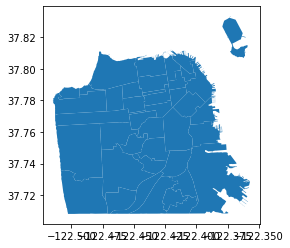

In [24]:
sf_shapefiles = gpd.read_file('sf_shapefiles.zip')
sf_shapefiles.to_crs(epsg=4326).plot() ## projection

In [25]:
# There are 41 neighborhoods in San Francisco
sf_shapefiles

,nhood,geometry
0,Western Addition,"POLYGON ((-122.42144 37.78557, -122.42136 37.7..."
1,West of Twin Peaks,"POLYGON ((-122.46104 37.75096, -122.46055 37.7..."
2,Visitacion Valley,"POLYGON ((-122.40385 37.71883, -122.40355 37.7..."
3,Twin Peaks,"POLYGON ((-122.44695 37.75655, -122.44595 37.7..."
4,South of Market,"POLYGON ((-122.40371 37.78404, -122.40271 37.7..."
5,Treasure Island,"POLYGON ((-122.36358 37.82087, -122.36046 37.8..."
6,Presidio Heights,"POLYGON ((-122.44630 37.79188, -122.44612 37.7..."
7,Presidio,"POLYGON ((-122.44813 37.80689, -122.44818 37.8..."
8,Potrero Hill,"POLYGON ((-122.38487 37.76724, -122.38485 37.7..."
9,Portola,"POLYGON ((-122.40466 37.73295, -122.40396 37.7..."


In [26]:
sf_shapefiles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   nhood     41 non-null     object  
 1   geometry  41 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 784.0+ bytes


### Geocoding
Download each top hotspots .csv and use geocodio to create longitude and latitude

In [27]:
# Create new dataframe for st_cleaning_map
hotspot_5yr = st_cleaning_map['Location_new'].value_counts().nlargest(100).reset_index()
hotspot_5yr = hotspot_5yr.rename(columns = {'index':'Address', 'Location_new':'Count'})
hotspot_5yr

,Address,Count
0,"1190 MISSION ST, SAN FRANCISCO, USA",466
1,"111 TAYLOR ST, SAN FRANCISCO, USA",344
2,"540 JONES ST, SAN FRANCISCO, USA",333
3,"1188 MISSION ST, SAN FRANCISCO, USA",290
4,"814 MISSION ST, SAN FRANCISCO, USA",282
...,...,...
95,"650 EDDY ST, SAN FRANCISCO, USA",140
96,"399 FREMONT ST, SAN FRANCISCO, USA",140
97,"44 TEHAMA ST, SAN FRANCISCO, USA",139
98,"1596 HOWARD ST, SAN FRANCISCO, USA",139


In [28]:
# Export to .csv for geocodio
hotspot_5yr.to_csv('hotspot_5yr.csv', index=False)

In [29]:
# Import geocodio .csv file
geo_hotspot_5yr = pd.read_csv('hotspot_5yr_geocodio.csv')
geo_hotspot_5yr

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source
0,"1190 MISSION ST, SAN FRANCISCO, USA",466,37.777920,-122.412770,1.0,rooftop,1190.0,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103.0,US,San Francisco
1,"111 TAYLOR ST, SAN FRANCISCO, USA",344,37.783430,-122.411080,1.0,rooftop,111.0,Taylor St,NaN,NaN,San Francisco,CA,San Francisco County,94102.0,US,San Francisco
2,"540 JONES ST, SAN FRANCISCO, USA",333,37.786360,-122.412780,1.0,rooftop,540.0,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102.0,US,San Francisco
3,"1188 MISSION ST, SAN FRANCISCO, USA",290,37.778160,-122.412636,1.0,rooftop,1188.0,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103.0,US,San Francisco
4,"814 MISSION ST, SAN FRANCISCO, USA",282,37.784405,-122.404945,1.0,rooftop,814.0,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103.0,US,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"650 EDDY ST, SAN FRANCISCO, USA",140,37.783302,-122.418465,1.0,rooftop,650.0,Eddy St,NaN,NaN,San Francisco,CA,San Francisco County,94109.0,US,San Francisco
96,"399 FREMONT ST, SAN FRANCISCO, USA",140,37.787260,-122.392296,1.0,rooftop,399.0,Fremont St,NaN,NaN,San Francisco,CA,San Francisco County,94105.0,US,San Francisco
97,"44 TEHAMA ST, SAN FRANCISCO, USA",139,37.787594,-122.396630,1.0,rooftop,44.0,Tehama St,NaN,NaN,San Francisco,CA,San Francisco County,94105.0,US,San Francisco
98,"1596 HOWARD ST, SAN FRANCISCO, USA",139,37.772130,-122.417046,1.0,rooftop,1596.0,Howard St,NaN,NaN,San Francisco,CA,San Francisco County,94103.0,US,San Francisco


In [30]:
# Check if all geometry points are located in SF long and lat
geo_hotspot_5yr[
    (geo_hotspot_5yr['Longitude'] < -122.515) |
    (geo_hotspot_5yr['Longitude'] > -122.358) 
]

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source
30,"65 CLEARY CT, SAN FRANCISCO, USA",182,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,"350 O'FARRELL ST, SAN FRANCISCO, USA",180,37.753891,-122.153679,0.7,street_center,NaN,Farrell St,NaN,NaN,Oakland,CA,Alameda County,94605.0,US,TIGER/Line® dataset from the US Census Bureau


In [31]:
geo_hotspot_5yr[
    (geo_hotspot_5yr['Latitude'] < 37.707) |
    (geo_hotspot_5yr['Latitude'] > 37.83) 
]

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source
30,"65 CLEARY CT, SAN FRANCISCO, USA",182,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Replaced misplaced location
geo_hotspot_5yr = geo_hotspot_5yr.replace(
    {'Latitude':{0.0:37.78387},
     'Longitude':{0.0:-122.42634}
    }
)

geo_hotspot_5yr.loc[(geo_hotspot_5yr.Address == '350 O\'FARRELL ST, SAN FRANCISCO, USA'), 'Latitude'] = 37.78656
geo_hotspot_5yr.loc[(geo_hotspot_5yr.Address == '350 O\'FARRELL ST, SAN FRANCISCO, USA'), 'Longitude'] = -122.41063

In [33]:
# Create geopandas geodataframe
geo_hotspot_5yr = gpd.GeoDataFrame(
    geo_hotspot_5yr, geometry=gpd.points_from_xy(geo_hotspot_5yr.Longitude, geo_hotspot_5yr.Latitude)
)

In [34]:
# Set projection
geo_hotspot_5yr.set_crs(epsg=4326, inplace=True)

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source,geometry
0,"1190 MISSION ST, SAN FRANCISCO, USA",466,37.777920,-122.412770,1.0,rooftop,1190.0,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103.0,US,San Francisco,POINT (-122.41277 37.77792)
1,"111 TAYLOR ST, SAN FRANCISCO, USA",344,37.783430,-122.411080,1.0,rooftop,111.0,Taylor St,NaN,NaN,San Francisco,CA,San Francisco County,94102.0,US,San Francisco,POINT (-122.41108 37.78343)
2,"540 JONES ST, SAN FRANCISCO, USA",333,37.786360,-122.412780,1.0,rooftop,540.0,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102.0,US,San Francisco,POINT (-122.41278 37.78636)
3,"1188 MISSION ST, SAN FRANCISCO, USA",290,37.778160,-122.412636,1.0,rooftop,1188.0,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103.0,US,San Francisco,POINT (-122.41264 37.77816)
4,"814 MISSION ST, SAN FRANCISCO, USA",282,37.784405,-122.404945,1.0,rooftop,814.0,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103.0,US,San Francisco,POINT (-122.40494 37.78440)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"650 EDDY ST, SAN FRANCISCO, USA",140,37.783302,-122.418465,1.0,rooftop,650.0,Eddy St,NaN,NaN,San Francisco,CA,San Francisco County,94109.0,US,San Francisco,POINT (-122.41846 37.78330)
96,"399 FREMONT ST, SAN FRANCISCO, USA",140,37.787260,-122.392296,1.0,rooftop,399.0,Fremont St,NaN,NaN,San Francisco,CA,San Francisco County,94105.0,US,San Francisco,POINT (-122.39230 37.78726)
97,"44 TEHAMA ST, SAN FRANCISCO, USA",139,37.787594,-122.396630,1.0,rooftop,44.0,Tehama St,NaN,NaN,San Francisco,CA,San Francisco County,94105.0,US,San Francisco,POINT (-122.39663 37.78759)
98,"1596 HOWARD ST, SAN FRANCISCO, USA",139,37.772130,-122.417046,1.0,rooftop,1596.0,Howard St,NaN,NaN,San Francisco,CA,San Francisco County,94103.0,US,San Francisco,POINT (-122.41705 37.77213)


In [35]:
# Check geometry point
geo_hotspot_5yr.head()

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source,geometry
0,"1190 MISSION ST, SAN FRANCISCO, USA",466,37.777920,-122.412770,1.0,rooftop,1190.0,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103.0,US,San Francisco,POINT (-122.41277 37.77792)
1,"111 TAYLOR ST, SAN FRANCISCO, USA",344,37.783430,-122.411080,1.0,rooftop,111.0,Taylor St,NaN,NaN,San Francisco,CA,San Francisco County,94102.0,US,San Francisco,POINT (-122.41108 37.78343)
2,"540 JONES ST, SAN FRANCISCO, USA",333,37.786360,-122.412780,1.0,rooftop,540.0,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102.0,US,San Francisco,POINT (-122.41278 37.78636)
3,"1188 MISSION ST, SAN FRANCISCO, USA",290,37.778160,-122.412636,1.0,rooftop,1188.0,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103.0,US,San Francisco,POINT (-122.41264 37.77816)
4,"814 MISSION ST, SAN FRANCISCO, USA",282,37.784405,-122.404945,1.0,rooftop,814.0,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103.0,US,San Francisco,POINT (-122.40494 37.78440)


### Top 100 hotspots in SF from 2018-2022

<AxesSubplot:>

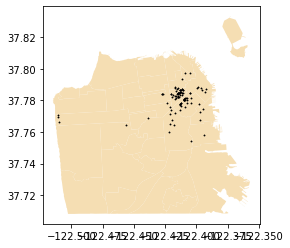

In [36]:
# Add sf base map
base_map = sf_shapefiles.plot(color = 'wheat')
geo_hotspot_5yr.plot(ax=base_map, marker = '*', color = 'black', markersize=1, alpha=1)

### Top 50 hotspots in SF from 2018-2022

In [37]:
geo_hotspot_5yr_50 = geo_hotspot_5yr.head(50).copy()

<AxesSubplot:>

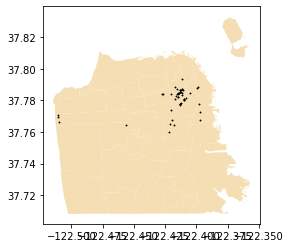

In [40]:
base_map = sf_shapefiles.plot(color = 'wheat')
geo_hotspot_5yr_50.plot(ax=base_map, marker = '*', color = 'black', markersize=1, alpha=1)

### Top 10 hotspots in SF from 2018-2022

In [41]:
geo_hotspot_5yr_10 = geo_hotspot_5yr.head(10).copy()

<AxesSubplot:>

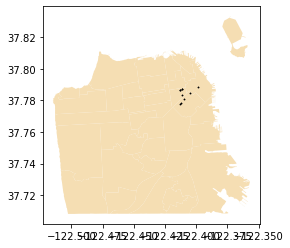

In [42]:
base_map = sf_shapefiles.plot(color = 'wheat')
geo_hotspot_5yr_10.plot(ax=base_map, marker = '*', color = 'black', markersize=1, alpha=1)

### Top 10 hotspots in SF in 2018

In [43]:
# Create new dataframe for 2018 st cleaning map
hotspot_2018 = map_count_2018.head(10).reset_index()
hotspot_2018 = hotspot_2018.rename(columns = {'index':'Address', 'Location_new':'Count'})
hotspot_2018

,Address,Count
0,"1000 GREAT HWY, SAN FRANCISCO, USA",179
1,"950 GREAT HWY, SAN FRANCISCO, USA",142
2,"1050 GREAT HWY, SAN FRANCISCO, USA",138
3,"814 MISSION ST, SAN FRANCISCO, USA",121
4,"555 MISSION ST, SAN FRANCISCO, USA",104
5,"50 CLEARY CT, SAN FRANCISCO, USA",89
6,"65 CLEARY CT, SAN FRANCISCO, USA",82
7,"60 CLEARY CT, SAN FRANCISCO, USA",80
8,"750 FONT BLVD, SAN FRANCISCO, USA",76
9,"40 CLEARY CT, SAN FRANCISCO, USA",73


In [44]:
# Export to .csv for geocodio
hotspot_2018.to_csv('hotspot_2018.csv', index=False)

In [45]:
# Import geocodio .csv file
hotspot_2018 = pd.read_csv('hotspot_2018_geocodio.csv')
hotspot_2018

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source
0,"1000 GREAT HWY, SAN FRANCISCO, USA",179,37.769814,-122.510544,1.0,rooftop,1000.0,Great Hwy,NaN,NaN,San Francisco,CA,San Francisco County,94121.0,US,San Francisco
1,"950 GREAT HWY, SAN FRANCISCO, USA",142,37.770586,-122.510926,1.0,range_interpolation,950.0,Great Hwy,NaN,NaN,San Francisco,CA,San Francisco County,94121.0,US,TIGER/Line® dataset from the US Census Bureau
2,"1050 GREAT HWY, SAN FRANCISCO, USA",138,37.766103,-122.510079,1.0,range_interpolation,1050.0,Great Hwy,NaN,NaN,San Francisco,CA,San Francisco County,94121.0,US,TIGER/Line® dataset from the US Census Bureau
3,"814 MISSION ST, SAN FRANCISCO, USA",121,37.784405,-122.404945,1.0,rooftop,814.0,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103.0,US,San Francisco
4,"555 MISSION ST, SAN FRANCISCO, USA",104,37.788600,-122.398674,1.0,rooftop,555.0,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94105.0,US,San Francisco
5,"50 CLEARY CT, SAN FRANCISCO, USA",89,37.784085,-122.427729,0.4,range_interpolation,50.0,Cleary Ct,NaN,NaN,San Francisco,CA,San Francisco County,94109.0,US,TIGER/Line® dataset from the US Census Bureau
6,"65 CLEARY CT, SAN FRANCISCO, USA",82,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"60 CLEARY CT, SAN FRANCISCO, USA",80,37.784087,-122.427714,0.4,range_interpolation,60.0,Cleary Ct,NaN,NaN,San Francisco,CA,San Francisco County,94109.0,US,TIGER/Line® dataset from the US Census Bureau
8,"750 FONT BLVD, SAN FRANCISCO, USA",76,37.722550,-122.482940,1.0,rooftop,750.0,Font Blvd,NaN,NaN,San Francisco,CA,San Francisco County,94132.0,US,San Francisco
9,"40 CLEARY CT, SAN FRANCISCO, USA",73,37.784082,-122.427744,0.4,range_interpolation,40.0,Cleary Ct,NaN,NaN,San Francisco,CA,San Francisco County,94109.0,US,TIGER/Line® dataset from the US Census Bureau


In [46]:
# Replace misplaced row[6]

hotspot_2018.loc[(hotspot_2018.Address == '65 CLEARY CT, SAN FRANCISCO, USA'), 'Latitude'] = 37.78396
hotspot_2018.loc[(hotspot_2018.Address == '65 CLEARY CT, SAN FRANCISCO, USA'), 'Longitude'] = -122.42682

In [47]:
# Create geopandas geodataframe and set crs
geo_hotspot_2018 = gpd.GeoDataFrame(
    hotspot_2018, geometry=gpd.points_from_xy(hotspot_2018.Longitude, hotspot_2018.Latitude)
)

# Set projection
geo_hotspot_2018.set_crs(epsg=4326, inplace=True)

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source,geometry
0,"1000 GREAT HWY, SAN FRANCISCO, USA",179,37.769814,-122.510544,1.0,rooftop,1000.0,Great Hwy,NaN,NaN,San Francisco,CA,San Francisco County,94121.0,US,San Francisco,POINT (-122.51054 37.76981)
1,"950 GREAT HWY, SAN FRANCISCO, USA",142,37.770586,-122.510926,1.0,range_interpolation,950.0,Great Hwy,NaN,NaN,San Francisco,CA,San Francisco County,94121.0,US,TIGER/Line® dataset from the US Census Bureau,POINT (-122.51093 37.77059)
2,"1050 GREAT HWY, SAN FRANCISCO, USA",138,37.766103,-122.510079,1.0,range_interpolation,1050.0,Great Hwy,NaN,NaN,San Francisco,CA,San Francisco County,94121.0,US,TIGER/Line® dataset from the US Census Bureau,POINT (-122.51008 37.76610)
3,"814 MISSION ST, SAN FRANCISCO, USA",121,37.784405,-122.404945,1.0,rooftop,814.0,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103.0,US,San Francisco,POINT (-122.40494 37.78440)
4,"555 MISSION ST, SAN FRANCISCO, USA",104,37.788600,-122.398674,1.0,rooftop,555.0,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94105.0,US,San Francisco,POINT (-122.39867 37.78860)
5,"50 CLEARY CT, SAN FRANCISCO, USA",89,37.784085,-122.427729,0.4,range_interpolation,50.0,Cleary Ct,NaN,NaN,San Francisco,CA,San Francisco County,94109.0,US,TIGER/Line® dataset from the US Census Bureau,POINT (-122.42773 37.78408)
6,"65 CLEARY CT, SAN FRANCISCO, USA",82,37.783960,-122.426820,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.42682 37.78396)
7,"60 CLEARY CT, SAN FRANCISCO, USA",80,37.784087,-122.427714,0.4,range_interpolation,60.0,Cleary Ct,NaN,NaN,San Francisco,CA,San Francisco County,94109.0,US,TIGER/Line® dataset from the US Census Bureau,POINT (-122.42771 37.78409)
8,"750 FONT BLVD, SAN FRANCISCO, USA",76,37.722550,-122.482940,1.0,rooftop,750.0,Font Blvd,NaN,NaN,San Francisco,CA,San Francisco County,94132.0,US,San Francisco,POINT (-122.48294 37.72255)
9,"40 CLEARY CT, SAN FRANCISCO, USA",73,37.784082,-122.427744,0.4,range_interpolation,40.0,Cleary Ct,NaN,NaN,San Francisco,CA,San Francisco County,94109.0,US,TIGER/Line® dataset from the US Census Bureau,POINT (-122.42774 37.78408)


<AxesSubplot:>

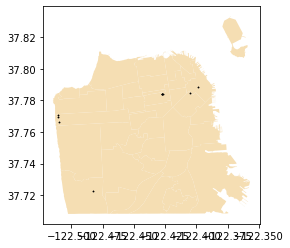

In [48]:
# Top 10 hotspots in 2018
base_map = sf_shapefiles.plot(color = 'wheat')
geo_hotspot_2018.plot(ax=base_map, marker = '*', color = 'black', markersize=1, alpha=1)

### Top 10 hotspots in SF in 2019

In [49]:
# Create new dataframe for 2018 st cleaning map
hotspot_2019 = map_count_2019.head(10).reset_index()
hotspot_2019 = hotspot_2019.rename(columns = {'index':'Address', 'Location_new':'Count'})
hotspot_2019

,Address,Count
0,"50 CLEARY CT, SAN FRANCISCO, USA",132
1,"555 MISSION ST, SAN FRANCISCO, USA",89
2,"400 FULTON ST, SAN FRANCISCO, USA",80
3,"814 MISSION ST, SAN FRANCISCO, USA",76
4,"1200 SAN BRUNO AVE, SAN FRANCISCO, USA",72
5,"318 HOWARD ST, SAN FRANCISCO, USA",60
6,"55 CLEARY CT, SAN FRANCISCO, USA",58
7,"450 RHODE ISLAND ST, SAN FRANCISCO, USA",58
8,"1009 MISSION ST, SAN FRANCISCO, USA",58
9,"973 MISSION ST, SAN FRANCISCO, USA",56


In [50]:
# Export to .csv for geocodio
hotspot_2019.to_csv('hotspot_2019.csv', index=False)

In [51]:
# Import geocodio .csv file
hotspot_2019 = pd.read_csv('hotspot_2019_geocodio.csv')
hotspot_2019

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source
0,"50 CLEARY CT, SAN FRANCISCO, USA",132,37.784085,-122.427729,0.4,range_interpolation,50,Cleary Ct,NaN,NaN,San Francisco,CA,San Francisco County,94109,US,TIGER/Line® dataset from the US Census Bureau
1,"555 MISSION ST, SAN FRANCISCO, USA",89,37.788600,-122.398674,1.0,rooftop,555,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94105,US,San Francisco
2,"400 FULTON ST, SAN FRANCISCO, USA",80,37.778596,-122.423354,1.0,range_interpolation,400,Fulton St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,TIGER/Line® dataset from the US Census Bureau
3,"814 MISSION ST, SAN FRANCISCO, USA",76,37.784405,-122.404945,1.0,rooftop,814,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco
4,"1200 SAN BRUNO AVE, SAN FRANCISCO, USA",72,37.754246,-122.404484,1.0,range_interpolation,1200,San Bruno Ave,NaN,NaN,San Francisco,CA,San Francisco County,94110,US,TIGER/Line® dataset from the US Census Bureau
5,"318 HOWARD ST, SAN FRANCISCO, USA",60,37.789905,-122.394508,1.0,range_interpolation,318,Howard St,NaN,NaN,San Francisco,CA,San Francisco County,94105,US,TIGER/Line® dataset from the US Census Bureau
6,"55 CLEARY CT, SAN FRANCISCO, USA",58,37.785003,-122.426232,0.4,range_interpolation,55,Cleary Ct,NaN,NaN,San Francisco,CA,San Francisco County,94109,US,TIGER/Line® dataset from the US Census Bureau
7,"450 RHODE ISLAND ST, SAN FRANCISCO, USA",58,37.764580,-122.402810,1.0,rooftop,450,Rhode Island St,NaN,NaN,San Francisco,CA,San Francisco County,94107,US,San Francisco
8,"1009 MISSION ST, SAN FRANCISCO, USA",58,37.780552,-122.408870,1.0,rooftop,1009,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco
9,"973 MISSION ST, SAN FRANCISCO, USA",56,37.781147,-122.407880,1.0,rooftop,973,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco


In [52]:
# Create geopandas geodataframe and set crs
geo_hotspot_2019 = gpd.GeoDataFrame(
    hotspot_2019, geometry=gpd.points_from_xy(hotspot_2019.Longitude, hotspot_2019.Latitude)
)

# Set projection
geo_hotspot_2019.set_crs(epsg=4326, inplace=True)

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source,geometry
0,"50 CLEARY CT, SAN FRANCISCO, USA",132,37.784085,-122.427729,0.4,range_interpolation,50,Cleary Ct,NaN,NaN,San Francisco,CA,San Francisco County,94109,US,TIGER/Line® dataset from the US Census Bureau,POINT (-122.42773 37.78408)
1,"555 MISSION ST, SAN FRANCISCO, USA",89,37.788600,-122.398674,1.0,rooftop,555,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94105,US,San Francisco,POINT (-122.39867 37.78860)
2,"400 FULTON ST, SAN FRANCISCO, USA",80,37.778596,-122.423354,1.0,range_interpolation,400,Fulton St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,TIGER/Line® dataset from the US Census Bureau,POINT (-122.42335 37.77860)
3,"814 MISSION ST, SAN FRANCISCO, USA",76,37.784405,-122.404945,1.0,rooftop,814,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco,POINT (-122.40494 37.78440)
4,"1200 SAN BRUNO AVE, SAN FRANCISCO, USA",72,37.754246,-122.404484,1.0,range_interpolation,1200,San Bruno Ave,NaN,NaN,San Francisco,CA,San Francisco County,94110,US,TIGER/Line® dataset from the US Census Bureau,POINT (-122.40448 37.75425)
5,"318 HOWARD ST, SAN FRANCISCO, USA",60,37.789905,-122.394508,1.0,range_interpolation,318,Howard St,NaN,NaN,San Francisco,CA,San Francisco County,94105,US,TIGER/Line® dataset from the US Census Bureau,POINT (-122.39451 37.78990)
6,"55 CLEARY CT, SAN FRANCISCO, USA",58,37.785003,-122.426232,0.4,range_interpolation,55,Cleary Ct,NaN,NaN,San Francisco,CA,San Francisco County,94109,US,TIGER/Line® dataset from the US Census Bureau,POINT (-122.42623 37.78500)
7,"450 RHODE ISLAND ST, SAN FRANCISCO, USA",58,37.764580,-122.402810,1.0,rooftop,450,Rhode Island St,NaN,NaN,San Francisco,CA,San Francisco County,94107,US,San Francisco,POINT (-122.40281 37.76458)
8,"1009 MISSION ST, SAN FRANCISCO, USA",58,37.780552,-122.408870,1.0,rooftop,1009,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco,POINT (-122.40887 37.78055)
9,"973 MISSION ST, SAN FRANCISCO, USA",56,37.781147,-122.407880,1.0,rooftop,973,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco,POINT (-122.40788 37.78115)


<AxesSubplot:>

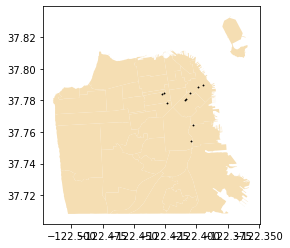

In [53]:
# Top 10 hotspots in 2019
base_map = sf_shapefiles.plot(color = 'wheat')
geo_hotspot_2019.plot(ax=base_map, marker = '*', color = 'black', markersize=1, alpha=1)

### Top 10 hotspots in SF in 2020

In [54]:
# Create new dataframe for 2018 st cleaning map
hotspot_2020 = map_count_2020.head(10).reset_index()
hotspot_2020 = hotspot_2020.rename(columns = {'index':'Address', 'Location_new':'Count'})
hotspot_2020

,Address,Count
0,"590 MISSION ST, SAN FRANCISCO, USA",74
1,"110 08TH ST, SAN FRANCISCO, USA",66
2,"111 TAYLOR ST, SAN FRANCISCO, USA",56
3,"1190 MISSION ST, SAN FRANCISCO, USA",51
4,"1018 MISSION ST, SAN FRANCISCO, USA",51
5,"540 JONES ST, SAN FRANCISCO, USA",50
6,"1036 MISSION STREET, SAN FRANCISCO, USA",49
7,"10 12TH ST, SAN FRANCISCO, USA",48
8,"355 MCALLISTER ST, SAN FRANCISCO, USA",46
9,"1055 MASON ST, SAN FRANCISCO, USA",44


In [55]:
# Export to .csv for geocodio
hotspot_2020.to_csv('hotspot_2020.csv', index=False)

In [56]:
# Import geocodio .csv file
hotspot_2020 = pd.read_csv('hotspot_2020_geocodio.csv')
hotspot_2020

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source
0,"590 MISSION ST, SAN FRANCISCO, USA",74,37.788220,-122.399705,1.00,range_interpolation,590,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94105,US,TIGER/Line® dataset from the US Census Bureau
1,"110 08TH ST, SAN FRANCISCO, USA",66,37.777232,-122.413146,0.95,range_interpolation,110,8th St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,TIGER/Line® dataset from the US Census Bureau
2,"111 TAYLOR ST, SAN FRANCISCO, USA",56,37.783430,-122.411080,1.00,rooftop,111,Taylor St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco
3,"1190 MISSION ST, SAN FRANCISCO, USA",51,37.777920,-122.412770,1.00,rooftop,1190,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco
4,"1018 MISSION ST, SAN FRANCISCO, USA",51,37.780704,-122.409454,1.00,rooftop,1018,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco
5,"540 JONES ST, SAN FRANCISCO, USA",50,37.786360,-122.412780,1.00,rooftop,540,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco
6,"1036 MISSION STREET, SAN FRANCISCO, USA",49,37.780440,-122.409645,1.00,rooftop,1036,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco
7,"10 12TH ST, SAN FRANCISCO, USA",48,37.774029,-122.420000,1.00,range_interpolation,10,12th St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,TIGER/Line® dataset from the US Census Bureau
8,"355 MCALLISTER ST, SAN FRANCISCO, USA",46,37.780130,-122.417755,1.00,rooftop,355,McAllister St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco
9,"1055 MASON ST, SAN FRANCISCO, USA",44,37.793470,-122.411360,1.00,rooftop,1055,Mason St,NaN,NaN,San Francisco,CA,San Francisco County,94108,US,San Francisco


In [57]:
# Create geopandas geodataframe and set crs
geo_hotspot_2020 = gpd.GeoDataFrame(
    hotspot_2020, geometry=gpd.points_from_xy(hotspot_2020.Longitude, hotspot_2020.Latitude)
)

# Set projection
geo_hotspot_2020.set_crs(epsg=4326, inplace=True)

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source,geometry
0,"590 MISSION ST, SAN FRANCISCO, USA",74,37.788220,-122.399705,1.00,range_interpolation,590,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94105,US,TIGER/Line® dataset from the US Census Bureau,POINT (-122.39970 37.78822)
1,"110 08TH ST, SAN FRANCISCO, USA",66,37.777232,-122.413146,0.95,range_interpolation,110,8th St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,TIGER/Line® dataset from the US Census Bureau,POINT (-122.41315 37.77723)
2,"111 TAYLOR ST, SAN FRANCISCO, USA",56,37.783430,-122.411080,1.00,rooftop,111,Taylor St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco,POINT (-122.41108 37.78343)
3,"1190 MISSION ST, SAN FRANCISCO, USA",51,37.777920,-122.412770,1.00,rooftop,1190,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco,POINT (-122.41277 37.77792)
4,"1018 MISSION ST, SAN FRANCISCO, USA",51,37.780704,-122.409454,1.00,rooftop,1018,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco,POINT (-122.40945 37.78070)
5,"540 JONES ST, SAN FRANCISCO, USA",50,37.786360,-122.412780,1.00,rooftop,540,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco,POINT (-122.41278 37.78636)
6,"1036 MISSION STREET, SAN FRANCISCO, USA",49,37.780440,-122.409645,1.00,rooftop,1036,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco,POINT (-122.40964 37.78044)
7,"10 12TH ST, SAN FRANCISCO, USA",48,37.774029,-122.420000,1.00,range_interpolation,10,12th St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,TIGER/Line® dataset from the US Census Bureau,POINT (-122.42000 37.77403)
8,"355 MCALLISTER ST, SAN FRANCISCO, USA",46,37.780130,-122.417755,1.00,rooftop,355,McAllister St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco,POINT (-122.41775 37.78013)
9,"1055 MASON ST, SAN FRANCISCO, USA",44,37.793470,-122.411360,1.00,rooftop,1055,Mason St,NaN,NaN,San Francisco,CA,San Francisco County,94108,US,San Francisco,POINT (-122.41136 37.79347)


<AxesSubplot:>

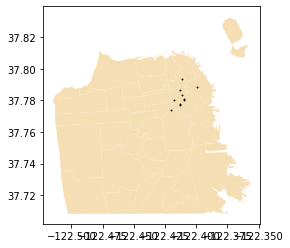

In [58]:
# Top 10 hotspots in 2020
base_map = sf_shapefiles.plot(color = 'wheat')
geo_hotspot_2020.plot(ax=base_map, marker = '*', color = 'black', markersize=1, alpha=1)

### Top 10 hotspots in SF in 2021

In [59]:
# Create new dataframe for 2018 st cleaning map
hotspot_2021 = map_count_2021.head(10).reset_index()
hotspot_2021 = hotspot_2021.rename(columns = {'index':'Address', 'Location_new':'Count'})
hotspot_2021

,Address,Count
0,"1190 MISSION ST, SAN FRANCISCO, USA",173
1,"1190 MISSION STREET, SAN FRANCISCO, USA",128
2,"556 JONES ST, SAN FRANCISCO, USA",127
3,"1188 MISSION ST, SAN FRANCISCO, USA",105
4,"540 JONES ST, SAN FRANCISCO, USA",104
5,"555 ELLIS ST, SAN FRANCISCO, USA",103
6,"101 POLK ST, SAN FRANCISCO, USA",99
7,"111 TAYLOR ST, SAN FRANCISCO, USA",96
8,"887 HOWARD STREET, SAN FRANCISCO, USA",93
9,"1188 MISSION STREET, SAN FRANCISCO, USA",92


In [60]:
# Export to .csv for geocodio
hotspot_2021.to_csv('hotspot_2021.csv', index=False)

In [61]:
# Import geocodio .csv file
hotspot_2021 = pd.read_csv('hotspot_2021_geocodio.csv')
hotspot_2021

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source
0,"1190 MISSION ST, SAN FRANCISCO, USA",173,37.777920,-122.412770,1,rooftop,1190,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco
1,"1190 MISSION STREET, SAN FRANCISCO, USA",128,37.777920,-122.412770,1,rooftop,1190,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco
2,"556 JONES ST, SAN FRANCISCO, USA",127,37.786568,-122.412960,1,rooftop,556,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco
3,"1188 MISSION ST, SAN FRANCISCO, USA",105,37.778160,-122.412636,1,rooftop,1188,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco
4,"540 JONES ST, SAN FRANCISCO, USA",104,37.786360,-122.412780,1,rooftop,540,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco
5,"555 ELLIS ST, SAN FRANCISCO, USA",103,37.784260,-122.415410,1,rooftop,555,Ellis St,NaN,NaN,San Francisco,CA,San Francisco County,94109,US,San Francisco
6,"101 POLK ST, SAN FRANCISCO, USA",99,37.777622,-122.418210,1,rooftop,101,Polk St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco
7,"111 TAYLOR ST, SAN FRANCISCO, USA",96,37.783430,-122.411080,1,rooftop,111,Taylor St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco
8,"887 HOWARD STREET, SAN FRANCISCO, USA",93,37.781604,-122.404264,1,range_interpolation,887,Howard St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,TIGER/Line® dataset from the US Census Bureau
9,"1188 MISSION STREET, SAN FRANCISCO, USA",92,37.778160,-122.412636,1,rooftop,1188,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco


In [62]:
# Create geopandas geodataframe and set crs
geo_hotspot_2021 = gpd.GeoDataFrame(
    hotspot_2021, geometry=gpd.points_from_xy(hotspot_2021.Longitude, hotspot_2021.Latitude)
)

# Set projection
geo_hotspot_2021.set_crs(epsg=4326, inplace=True)

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source,geometry
0,"1190 MISSION ST, SAN FRANCISCO, USA",173,37.777920,-122.412770,1,rooftop,1190,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco,POINT (-122.41277 37.77792)
1,"1190 MISSION STREET, SAN FRANCISCO, USA",128,37.777920,-122.412770,1,rooftop,1190,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco,POINT (-122.41277 37.77792)
2,"556 JONES ST, SAN FRANCISCO, USA",127,37.786568,-122.412960,1,rooftop,556,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco,POINT (-122.41296 37.78657)
3,"1188 MISSION ST, SAN FRANCISCO, USA",105,37.778160,-122.412636,1,rooftop,1188,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco,POINT (-122.41264 37.77816)
4,"540 JONES ST, SAN FRANCISCO, USA",104,37.786360,-122.412780,1,rooftop,540,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco,POINT (-122.41278 37.78636)
5,"555 ELLIS ST, SAN FRANCISCO, USA",103,37.784260,-122.415410,1,rooftop,555,Ellis St,NaN,NaN,San Francisco,CA,San Francisco County,94109,US,San Francisco,POINT (-122.41541 37.78426)
6,"101 POLK ST, SAN FRANCISCO, USA",99,37.777622,-122.418210,1,rooftop,101,Polk St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco,POINT (-122.41821 37.77762)
7,"111 TAYLOR ST, SAN FRANCISCO, USA",96,37.783430,-122.411080,1,rooftop,111,Taylor St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco,POINT (-122.41108 37.78343)
8,"887 HOWARD STREET, SAN FRANCISCO, USA",93,37.781604,-122.404264,1,range_interpolation,887,Howard St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,TIGER/Line® dataset from the US Census Bureau,POINT (-122.40426 37.78160)
9,"1188 MISSION STREET, SAN FRANCISCO, USA",92,37.778160,-122.412636,1,rooftop,1188,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco,POINT (-122.41264 37.77816)


<AxesSubplot:>

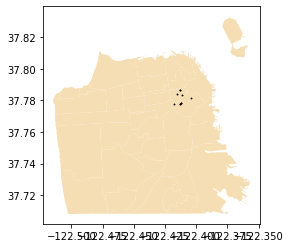

In [63]:
# Top 10 hotspots in 2021
base_map = sf_shapefiles.plot(color = 'wheat')
geo_hotspot_2021.plot(ax=base_map, marker = '*', color = 'black', markersize=1, alpha=1)

### Top 10 hotspots in SF in 2022

In [64]:
# Create new dataframe for 2018 st cleaning map
hotspot_2022 = map_count_2022.head(10).reset_index()
hotspot_2022 = hotspot_2022.rename(columns = {'index':'Address', 'Location_new':'Count'})
hotspot_2022

,Address,Count
0,"1190 MISSION ST, SAN FRANCISCO, USA",132
1,"540 JONES ST, SAN FRANCISCO, USA",107
2,"1018 MISSION ST, SAN FRANCISCO, USA",103
3,"111 TAYLOR ST, SAN FRANCISCO, USA",98
4,"450 JONES ST, SAN FRANCISCO, USA",93
5,"50 JONES ST, SAN FRANCISCO, USA",86
6,"1188 MISSION ST, SAN FRANCISCO, USA",85
7,"363 06TH ST, SAN FRANCISCO, USA",81
8,"520 SOUTH VAN NESS AVE, SAN FRANCISCO, USA",79
9,"1333 JONES ST, SAN FRANCISCO, USA",74


In [65]:
# Export to .csv for geocodio
hotspot_2022.to_csv('hotspot_2022.csv', index=False)

In [66]:
# Import geocodio .csv file
hotspot_2022 = pd.read_csv('hotspot_2022_geocodio.csv')
hotspot_2022

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source
0,"1190 MISSION ST, SAN FRANCISCO, USA",132,37.777920,-122.412770,1,rooftop,1190,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco
1,"540 JONES ST, SAN FRANCISCO, USA",107,37.786360,-122.412780,1,rooftop,540,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco
2,"1018 MISSION ST, SAN FRANCISCO, USA",103,37.780704,-122.409454,1,rooftop,1018,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco
3,"111 TAYLOR ST, SAN FRANCISCO, USA",98,37.783430,-122.411080,1,rooftop,111,Taylor St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco
4,"450 JONES ST, SAN FRANCISCO, USA",93,37.785545,-122.412710,1,rooftop,450,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco
5,"50 JONES ST, SAN FRANCISCO, USA",86,37.781800,-122.411736,1,rooftop,50,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco
6,"1188 MISSION ST, SAN FRANCISCO, USA",85,37.778160,-122.412636,1,rooftop,1188,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco
7,"363 06TH ST, SAN FRANCISCO, USA",81,37.778050,-122.404450,1,rooftop,363,6th St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco
8,"520 SOUTH VAN NESS AVE, SAN FRANCISCO, USA",79,37.764660,-122.417595,1,rooftop,520,S Van Ness Ave,NaN,NaN,San Francisco,CA,San Francisco County,94110,US,San Francisco
9,"1333 JONES ST, SAN FRANCISCO, USA",74,37.793620,-122.414880,1,rooftop,1333,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94109,US,San Francisco


In [67]:
# Create geopandas geodataframe and set crs
geo_hotspot_2022 = gpd.GeoDataFrame(
    hotspot_2022, geometry=gpd.points_from_xy(hotspot_2022.Longitude, hotspot_2022.Latitude)
)

# Set projection
geo_hotspot_2022.set_crs(epsg=4326, inplace=True)

,Address,Count,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source,geometry
0,"1190 MISSION ST, SAN FRANCISCO, USA",132,37.777920,-122.412770,1,rooftop,1190,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco,POINT (-122.41277 37.77792)
1,"540 JONES ST, SAN FRANCISCO, USA",107,37.786360,-122.412780,1,rooftop,540,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco,POINT (-122.41278 37.78636)
2,"1018 MISSION ST, SAN FRANCISCO, USA",103,37.780704,-122.409454,1,rooftop,1018,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco,POINT (-122.40945 37.78070)
3,"111 TAYLOR ST, SAN FRANCISCO, USA",98,37.783430,-122.411080,1,rooftop,111,Taylor St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco,POINT (-122.41108 37.78343)
4,"450 JONES ST, SAN FRANCISCO, USA",93,37.785545,-122.412710,1,rooftop,450,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco,POINT (-122.41271 37.78554)
5,"50 JONES ST, SAN FRANCISCO, USA",86,37.781800,-122.411736,1,rooftop,50,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94102,US,San Francisco,POINT (-122.41174 37.78180)
6,"1188 MISSION ST, SAN FRANCISCO, USA",85,37.778160,-122.412636,1,rooftop,1188,Mission St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco,POINT (-122.41264 37.77816)
7,"363 06TH ST, SAN FRANCISCO, USA",81,37.778050,-122.404450,1,rooftop,363,6th St,NaN,NaN,San Francisco,CA,San Francisco County,94103,US,San Francisco,POINT (-122.40445 37.77805)
8,"520 SOUTH VAN NESS AVE, SAN FRANCISCO, USA",79,37.764660,-122.417595,1,rooftop,520,S Van Ness Ave,NaN,NaN,San Francisco,CA,San Francisco County,94110,US,San Francisco,POINT (-122.41760 37.76466)
9,"1333 JONES ST, SAN FRANCISCO, USA",74,37.793620,-122.414880,1,rooftop,1333,Jones St,NaN,NaN,San Francisco,CA,San Francisco County,94109,US,San Francisco,POINT (-122.41488 37.79362)


<AxesSubplot:>

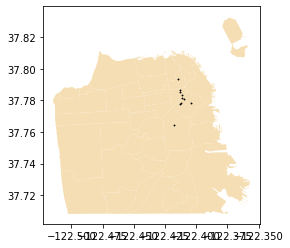

In [71]:
# Top 10 hotspots in 2022
base_map = sf_shapefiles.plot(color = 'wheat')
geo_hotspot_2022.plot(ax=base_map, marker = '*', color = 'black', markersize=1, alpha=1)

## Conclusion

Top hotspots within five years (2018-2022) are mostly located in the eastside of the city.  
If we look at the top 10 hotspots each year, the hotspots locations get more concentrated from 2018 to 2022.  
Next notebook, we will take a look at the street cleaning schedule in SF to compare with the hotspots locations.